In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import cv2, random
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from sklearn.preprocessing import normalize
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

Using TensorFlow backend.


# process data

In [ ]:
!unzip -q 'drive/My Drive/Colab Notebooks/pytorch tut/covid19/full_unbalance_dataset.zip' -d full_unbalance_dataset

In [ ]:
x_covid_train_path = 'full_unbalance_dataset/dataset/Train/Covid'
x_normal_train_path = 'full_unbalance_dataset/dataset/Train/Normal'
x_covid_val_path = 'full_unbalance_dataset/dataset/Val/Covid'
x_normal_val_path = 'full_unbalance_dataset/dataset/Val/Normal'

In [ ]:
x_covid_train = [os.path.join(x_covid_train_path,i) for i in os.listdir(x_covid_train_path)]
x_normal_train = [os.path.join(x_normal_train_path,i) for i in os.listdir(x_normal_train_path)]
x_covid_val = [os.path.join(x_covid_val_path,i) for i in os.listdir(x_covid_val_path)]
x_normal_val = [os.path.join(x_normal_val_path,i) for i in os.listdir(x_normal_val_path)]

In [ ]:
y_covid_train = [0 for i in range(len(x_covid_train))]
y_normal_train = [1 for i in range(len(x_normal_train))]
y_covid_val = [0 for i in range(len(x_covid_val))]
y_normal_val = [1 for i in range(len(x_normal_val))]

In [ ]:
x_train = x_covid_train + x_normal_train
x_val = x_covid_val + x_normal_val

y_train = y_covid_train + y_normal_train
y_val = y_covid_val + y_normal_val

In [ ]:
print(len(x_train),len(y_train),len(x_val),len(y_val))

453 453 130 130


In [ ]:
z = list(zip(x_train, y_train))
random.shuffle(z)
x_train, y_train = zip(*z)

In [ ]:
z = list(zip(x_val,y_val))
random.shuffle(z)
x_val,y_val = zip(*z)

In [ ]:
def read_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  return cv2.resize(image,(224,224),interpolation = cv2.INTER_CUBIC)
def load_data(list_path):
  image_list= []
  for i, image_path in enumerate(list_path):
    image = read_image(image_path)
    image_list.append(image)
    if i % 500 == 0 : print('load {} in {} images'.format(i,len(list_path)))
  return image_list

In [ ]:
x_train = load_data(x_train)
x_val = load_data(x_val)

load 0 in 224 images
load 0 in 60 images


In [ ]:
label_name = ['covid', 'normal']
# demo data
for i in range(5) :
  print("{}".format(label_name[y_train[i]]))
  plt.imshow(x_train[i])
  plt.show()
  

In [ ]:
one_hot_labels = np.zeros((len(y_train),2))
for i in range(len(y_train)) :
  one_hot_labels[i][y_train[i]] = 1
y_train_1hot = one_hot_labels
y_train_1hot.shape

(224, 2)

In [ ]:
one_hot_labels = np.zeros((len(y_val),2))
for i in range(len(y_val)) :
  one_hot_labels[i][y_val[i]] = 1
y_val_1hot = one_hot_labels
y_val_1hot.shape

(60, 2)

# Build model

In [ ]:
# optim = keras.optimizers.Adam(learning_rate=0.00001)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['accuracy'])

# data argument

In [ ]:
x_train = np.array(x_train)

In [ ]:
x_train = np.reshape((1,)+x_train.shape)

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'full_unbalance_dataset/dataset/Train',
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        'full_unbalance_dataset/dataset/Val',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')


Found 453 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


# Training

In [ ]:
model.summary()

In [ ]:
hist_new = model.fit_generator(
        train_generator,
        # steps_per_epoch=15,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=5
        )
model.save_weights('first_try.h5') 

Epoch 1/10
15/15 [==============================] - 18s 1s/step - loss: 0.6453 - accuracy: 0.7020 - val_loss: 0.4495 - val_accuracy: 0.7692
Epoch 2/10
15/15 [==============================] - 17s 1s/step - loss: 0.5627 - accuracy: 0.7528 - val_loss: 0.4183 - val_accuracy: 0.7692
Epoch 3/10
15/15 [==============================] - 17s 1s/step - loss: 0.4454 - accuracy: 0.7660 - val_loss: 0.0596 - val_accuracy: 0.8769
Epoch 4/10
15/15 [==============================] - 17s 1s/step - loss: 0.3578 - accuracy: 0.8631 - val_loss: 0.1598 - val_accuracy: 0.8846
Epoch 5/10
15/15 [==============================] - 17s 1s/step - loss: 0.2436 - accuracy: 0.9007 - val_loss: 8.6935e-06 - val_accuracy: 0.8692
Epoch 6/10
15/15 [==============================] - 17s 1s/step - loss: 0.1790 - accuracy: 0.9139 - val_loss: 0.1278 - val_accuracy: 0.8846
Epoch 7/10
15/15 [==============================] - 17s 1s/step - loss: 0.2370 - accuracy: 0.9095 - val_loss: 0.1409 - val_accuracy: 0.8154
Epoch 8/10
15/15

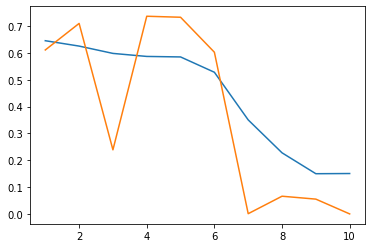

In [ ]:
x = [i+1 for i in range(10)]
plt.plot(x,hist_new.history['loss'])
plt.plot(x,hist_new.history['val_loss'])

# confusion matrix 

In [ ]:
import os
train_generator.class_indices 

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual, y_test = [], [] 

In [ ]:
for i in os.listdir("full_unbalance_dataset/dataset/Val/Normal/"):
    img = image.load_img("full_unbalance_dataset/dataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    pred = model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [ ]:
for i in os.listdir("full_unbalance_dataset/dataset/Val/Covid/"):
    img = image.load_img("full_unbalance_dataset/dataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    pred = model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn = confusion_matrix(y_actual, y_test)

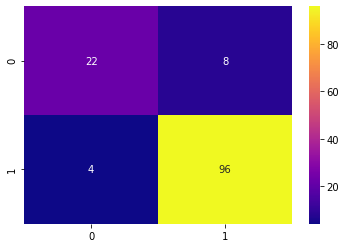

In [ ]:
sns.heatmap(cn, cmap="plasma", annot=True) #0: Covid; 1: Normal